In [1]:
%reload_ext autoreload
%autoreload 2
sys.path.insert(0, '../../src/')
import pandas as pd
import sys
import data_loader
import re
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
seasons = data_loader.load_data(resolve = True)

Text(0, 0.5, 'Count')

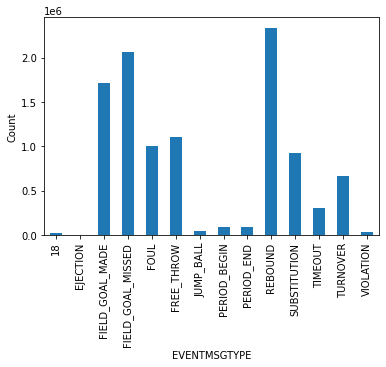

In [29]:
ax = seasons.groupby("EVENTMSGTYPE").size().plot.bar(logy=False)
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

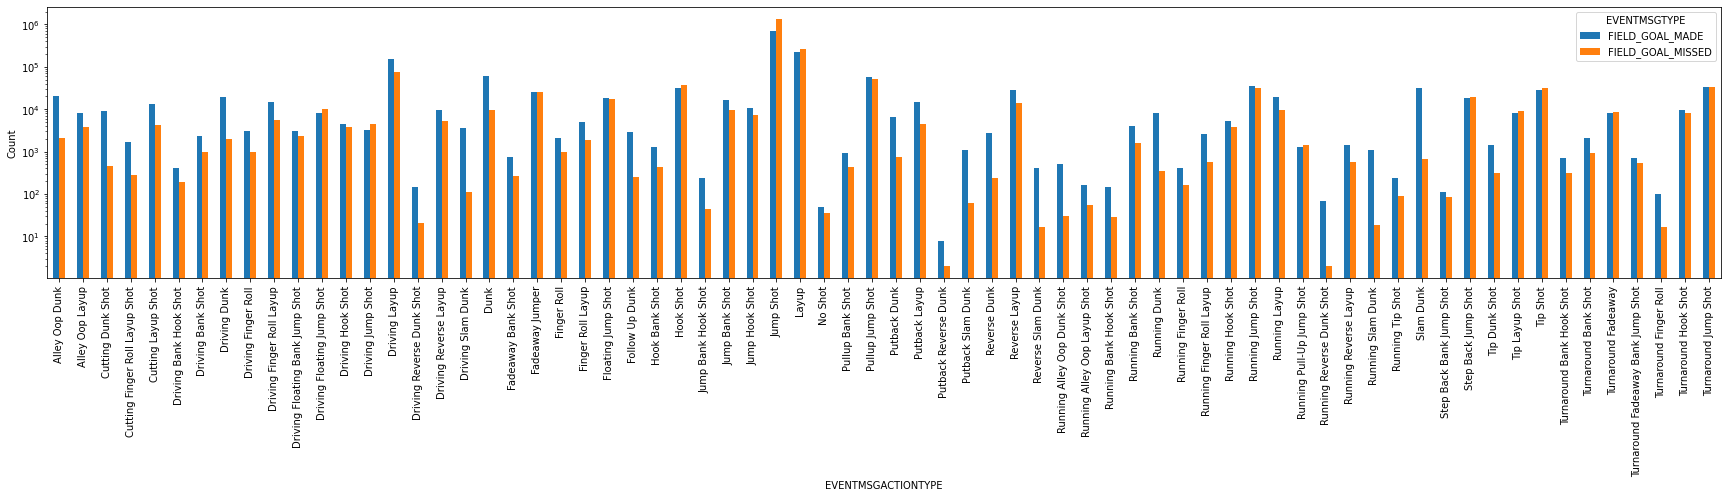

In [30]:
ax = seasons[seasons["EVENTMSGTYPE"].isin(["FIELD_GOAL_MADE","FIELD_GOAL_MISSED"])].groupby(["EVENTMSGTYPE","EVENTMSGACTIONTYPE"]).size().unstack("EVENTMSGTYPE").plot.bar(logy = True, figsize=(30,5))
ax.set_ylabel("Count")

<AxesSubplot:xlabel='PERIOD'>

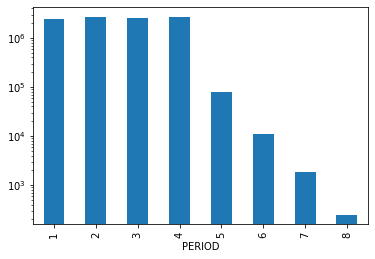

In [32]:
seasons.groupby("PERIOD").size().plot.bar(logy=True)

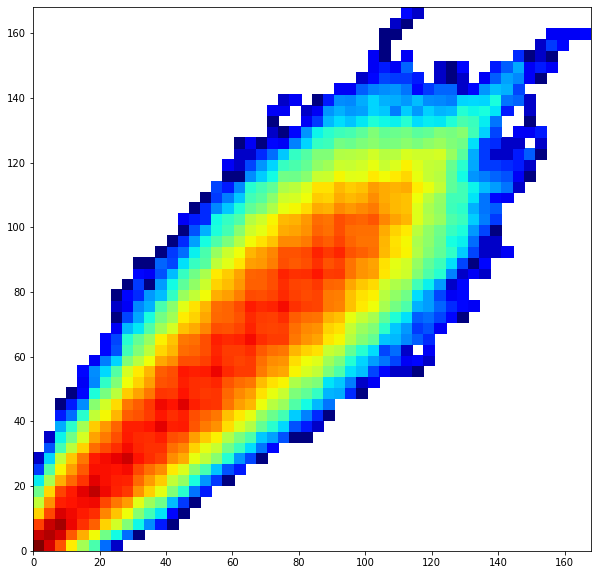

In [51]:
scores = seasons[~seasons["SCORE"].isna()]["SCORE"].str.split(" - ",expand=True)
plt.figure(figsize=(10, 10))
plt.hist2d(scores[0].astype(int), scores[1].astype(int), bins=(50, 50), cmap=plt.cm.jet, norm=mpl.colors.LogNorm())
plt.show()

Text(0, 0.5, 'Nr. of games')

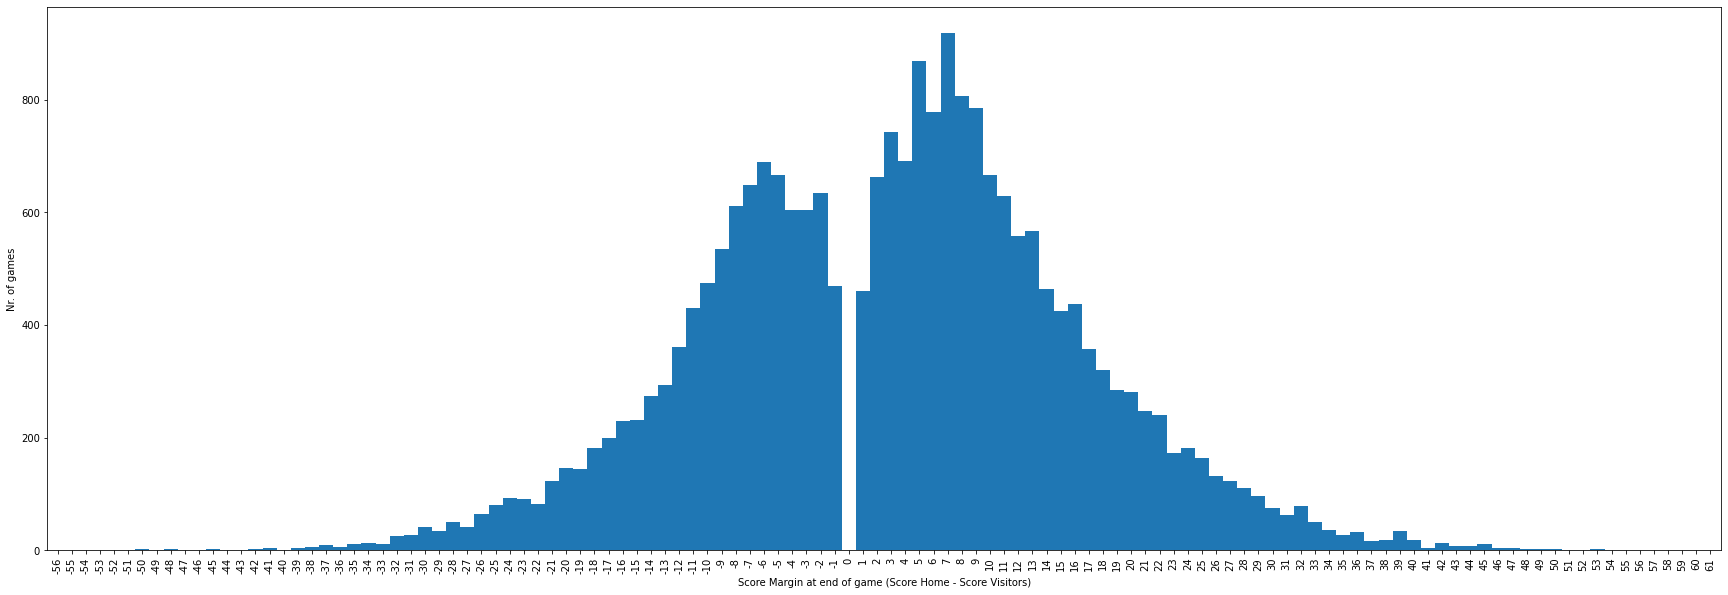

In [28]:
score_margin = seasons[~seasons["SCOREMARGIN"].isna()].groupby("GAME_ID")["SCOREMARGIN"].last().astype(int).value_counts()
score_margin = score_margin.reindex(list(range(score_margin.index.min(),score_margin.index.max()+1)),fill_value=0)
ax = score_margin.sort_index().plot.bar(figsize=(30,10), width=1)
ax.set_xlabel("Score Margin at end of game (Score Home - Score Visitors)")
ax.set_ylabel("Nr. of games")